## Analyze ArtEmis dataset along some basic axis regarding the emotions indicated & the language characteristics.

#### Assumes you have downloaded the dataset. Please adapt the directory locations for the preprocessed ArtEmis data + the WikiArt images.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from functools import partial
from ast import literal_eval

from artemis.in_out.basics import show_random_captions
from artemis.emotions import ARTEMIS_EMOTIONS, LARGER_EMOTION_VOCAB, positive_negative_else
from artemis.analysis.emotion_centric import df_to_emotion_histogram, has_emotion_max_dominance
from artemis.evaluation.metaphors import metaphorical_substrings

import os
from os import listdir
from os.path import isfile, join

sns.set()
%load_ext autoreload
%autoreload 2

In [6]:
##
## Change these two directories to your local top-directories.
##
artemis_preprocessed_csv = '/data/s3021637/Creative-Adversarial-Networks-master/affective-creative-adverserial-net/preprocessed/artemis_preprocessed.csv'
#wikiart_subset_img_dir = '/Users/sen/Documents/University/Leiden/3/Advances_Neural_Nets/wikiart_subset'
wikiart_img_dir = '/data/s3021637/Creative-Adversarial-Networks-master/data/wikiart'
save_figs = False # to save the output figures generated or not.

In [7]:
# Files provided in the code-repo to help the analysis.
glove_vocab_file = '/data/s3021637/Creative-Adversarial-Networks-master/affective-creative-adverserial-net/artemis/data/glove.6B.100d.vocabulary.txt'
wikiart_genre_labels_file = '/data/s3021637/Creative-Adversarial-Networks-master/affective-creative-adverserial-net/artemis/data/wiki_art_genre_class.csv'

In [8]:
# load preprocessed file with annotations.
df = pd.read_csv(artemis_preprocessed_csv)
df.tokens = df.tokens.apply(literal_eval) # to make them a python list.
print(f'{len(df)} annotations were loaded from the non-subsetted data-set.')

454684 annotations were loaded from the non-subsetted data-set.


In [15]:
# subset data
subset_folders = 'Analytical_Cubism Cubism Expressionism Fauvism Synthetic_Cubism'

subset_imgfiles = []

for folder in subset_folders.split():
    path = '/Users/sen/Documents/University/Leiden/3/Advances_Neural_Nets/wikiart/' + folder
    subset_imgfiles += [f for f in listdir(path) if isfile(join(path, f))]

subset_imgfiles = [s.strip('.jpg') for s in subset_imgfiles]
intersec = list(set(subset_imgfiles) & set(list(df['painting'])))
df_sub = df
df_sub['bool_index'] = df_sub["painting"].isin(intersec)
df_sub = df_sub.loc[df_sub['bool_index'] == True]
print(f'{len(df_sub)} annotations were loaded from the subsetted data-set.')

41037 annotations were loaded from the subsetted data-set.


In [9]:
# Add a label to indicate if the emotion is positive or negative or Something-Else
df = df.assign(pne = df.emotion.apply(positive_negative_else))
#df_sub = df_sub.assign(pne = df.emotion.apply(positive_negative_else))

In [10]:
##
## Basic Stats Full Data
##
print('Basic Stats Full Data')
print('---------------------')
print('Token Length:')
print('Average', df.tokens_len.mean(), 'Median', df.tokens_len.median(), 'Max', df.tokens_len.max())

grouped_artwork = df.groupby(['art_style', 'painting'])
print('Unique paintings annotated:', len(grouped_artwork.size()))
print('Average annotators per painting:', grouped_artwork.size().mean())

##
## Basic Stats Subset Data
##
#print('Basic Stats Subset Data')
#print('-----------------------')
#print('Token Length:')
#print('Average', df_sub.tokens_len.mean(), 'Median', df_sub.tokens_len.median(), 'Max', df_sub.tokens_len.max())
#grouped_artwork_sub = df_sub.groupby(['art_style', 'painting'])
#print('Unique paintings annotated:', len(grouped_artwork_sub.size()))
#print('Average annotators per painting:', grouped_artwork_sub.size().mean())
#

Basic Stats Full Data
---------------------
Token Length:
Average 15.920551415928426 Median 14.0 Max 207
Unique paintings annotated: 80031
Average annotators per painting: 5.681348477464982


In [11]:
# Unique Tokens Full Data
u_tokens = set()
df.tokens.apply(lambda x: [u_tokens.add(i) for i in x]);
print('Full Data')
print('-----------------------')
print('Upper bound on unique tokens (vocab size). ', len(u_tokens))

## Unique Tokens Subset
#u_tokens = set()
#df_sub.tokens.apply(lambda x: [u_tokens.add(i) for i in x]);
#print('Subset Data')
#print('-----------------------')
#print('Upper bound on unique tokens (vocab size). ', len(u_tokens))

Full Data
-----------------------
Upper bound on unique tokens (vocab size).  37250


In [12]:
##
## Enrich the Dataframe with meta-data.
##

# Add art-genre labels from WikiArt (not all artworks have this). Makes new data-frame.
genre_info = pd.read_csv(wikiart_genre_labels_file)
df_with_genre = pd.merge(df, genre_info, on=['art_style', 'painting'])
print('-----------------------')
print('Full Data')
print('-----------------------')
print('Not all paintings have a genre label, the reduced set of ArtEmis on those who have is', len(df_with_genre))
print('Percentages of ArtEmis utterances in each art-genre:')
print(genre_info.groupby('genre').describe()['art_style']['count'] / len(genre_info))

## Create genre info for Subset Data 
#genre_intersec = list(set(subset_imgfiles) & set(list(genre_info['painting'])))
#genre_info_sub = genre_info
#genre_info_sub['bool_index'] = genre_info_sub["painting"].isin(intersec)
#genre_info_sub = genre_info_sub.loc[genre_info_sub['bool_index'] == True]
#df_sub_with_genre = pd.merge(df_sub, genre_info_sub, on=['art_style', 'painting'])
#print('-----------------------')
#print('Subset Data')
#print('-----------------------')
#print('Not all paintings have a genre label, the reduced set of ArtEmis on those who have is', len(df_sub_with_genre))
#print('Percentages of ArtEmis utterances in each art-genre:')
#print(genre_info_sub.groupby('genre').describe()['art_style']['count'] / len(genre_info_sub))

-----------------------
Full Data
-----------------------
Not all paintings have a genre label, the reduced set of ArtEmis on those who have is 361549
Percentages of ArtEmis utterances in each art-genre:
genre
abstract_painting     0.0764366
cityscape             0.0708208
genre_painting         0.167074
illustration          0.0292638
landscape              0.205524
nude_painting         0.0295869
portrait                0.21714
religious_painting     0.100592
sketch_and_study      0.0606662
still_life            0.0428956
Name: count, dtype: object


NameError: name 'subset_imgfiles' is not defined

In [9]:
# for use on smaller wikiart subset data

# collect folder names and filter data

#dict_lst, file_lst = [], []

#for root, dirs, files in os.walk("/Users/sen/Documents/University/Leiden/3/Advances_Neural_Nets/wikiart_subset", topdown=False):
#    for name in dirs:
#        dict_lst.append(os.path.join(root, name))

#for eachfolder in range(len(dict_lst)):
#    file_lst += [f for f in listdir(dict_lst[eachfolder]) if isfile(join(dict_lst[eachfolder], f))]
#subset_files = [s.strip('.jpg') for s in file_lst]
#intersec = list(set(subset_files) & set(list(df['painting'])))
#df_new = df
#df_new['bool_index'] = df_new["painting"].isin(intersec)
#df_subset = df_new.loc[df_new['bool_index'] == True]

Abstract_Expressionism jimmy-ernst_terra-incognita-10-1974


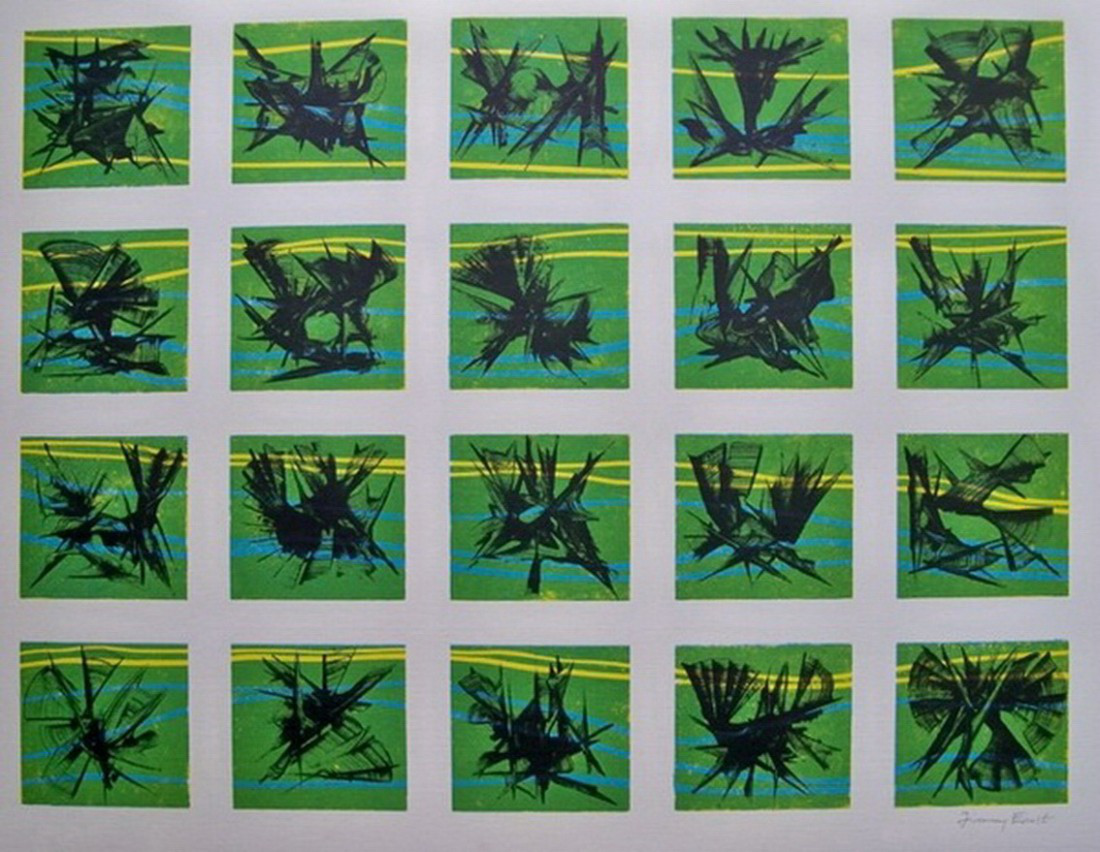

DISGUST:	The colors of this makes me think of sickness and the dark shapes look like tearing.
CONTENTMENT:	The variety in the black drawing in the squares is enjoyable.
SADNESS:	The dark black marks on the bright green screen remind me of broken glass, like broken dreams.
CONTENTMENT:	The greens and yellows in this are peaceful and calming
FEAR:	Each tile looks like a evil spider trying to break out of reality.


NameError: name 'df_subset' is not defined

In [13]:
# for use on original full wikiart data use df instead of df_subset
show_random_captions(df, wikiart_img_dir)

## for use on smaller wikiart subset data change df to df_subset
#show_random_captions(df_subset, wikiart_img_dir)


Impressionism camille-pissarro_a-servant-seated-in-the-garden-at-eragny-1884


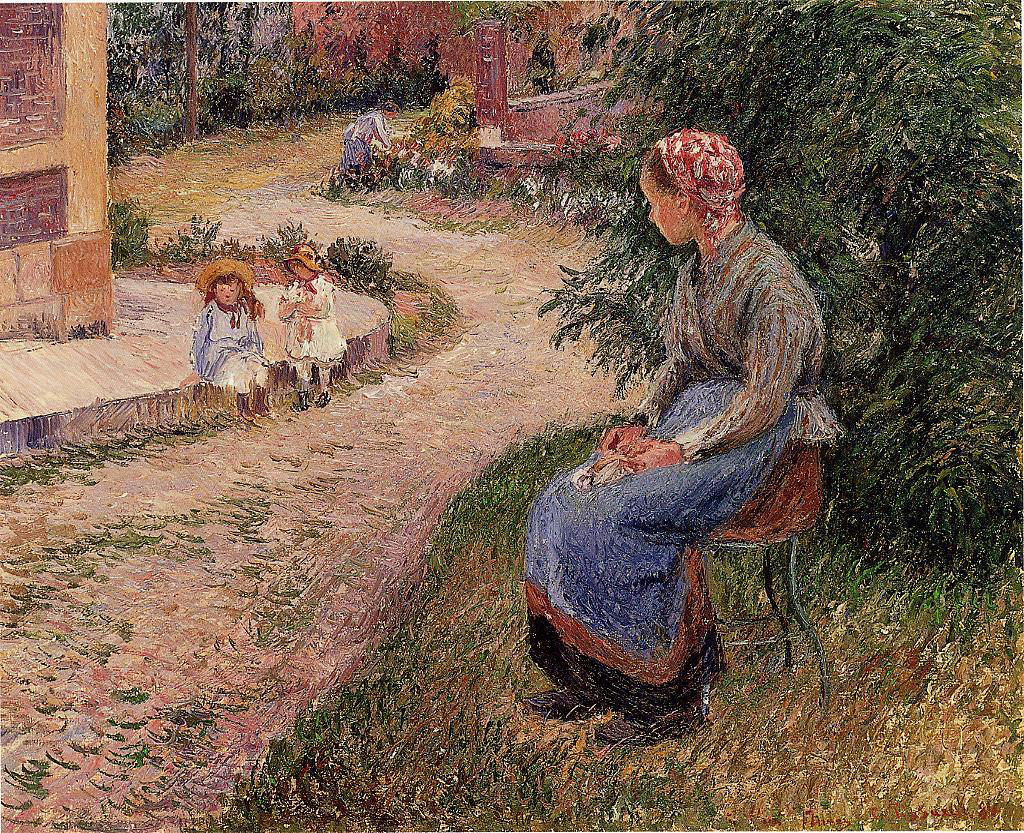

AWE:	The admiration between both parties is beautiful.
CONTENTMENT:	Children playing by the street as the mother loving looks on reminds me of childhood and its simplicity.
AWE:	I see a young girl watching over her siblings. They appear to be close.
SADNESS:	It is a shame that the innocence of youth is so fleeting.
CONTENTMENT:	The little girls look like they are sitting there gossiping while being watched over by this woman


In [35]:
# for use on original full wikiart data

# Show captions for a random portait.
sb = df_with_genre[df_with_genre.genre == 'portrait']
show_random_captions(sb, wikiart_img_dir)

## Show captions for a random portait.
#sb = df_sub_with_genre[df_sub_with_genre.genre == 'portrait']
#show_random_captions(sb, wikiart_img_dir)

# for use on smaller wikiart subset data

# filter data and create subset
#genre_intersec = list(set(subset_files) & set(list(df_with_genre['painting'])))
#df_new_with_genre = df_with_genre
#df_new_with_genre['bool_index'] = df_new_with_genre["painting"].isin(genre_intersec)
#df_subset_with_genre = df_new_with_genre.loc[df_new_with_genre['bool_index'] == True]
#df_subset_with_genre[df_subset_with_genre.genre == 'portrait']

#sb = df_subset_with_genre[df_subset_with_genre.genre == 'portrait']
#show_random_captions(sb, wikiart_subset_img_dir)

NameError: name 'df_sub' is not defined

<Figure size 432x288 with 0 Axes>

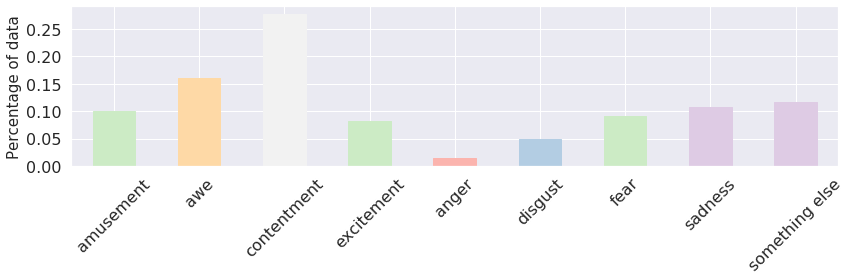

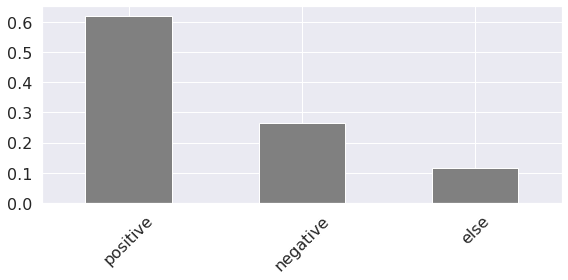

In [15]:
##
## make a histogram of the emotions
##
df_to_emotion_histogram(df)

## histogram for subset data
#df_to_emotion_histogram(df_sub)

In [16]:
print('-----------------------')
print('Full Data')
print('-----------------------')
print(df.groupby('pne')['emotion'].count() / len(df))

#print('-----------------------')
#print('Subset Data')
#print('-----------------------')
#print(df_sub.groupby('pne')['emotion'].count() / len(df_sub))

-----------------------
Full Data
-----------------------
pne
0    0.620284
1    0.263236
2    0.116481
Name: emotion, dtype: float64


In [17]:
## Quick analysis on emotions and subjectivity.  (this can take up to a minute!)
has_pos_feels = grouped_artwork.apply(lambda group: 0 in group.pne.unique())
has_neg_feels = grouped_artwork.apply(lambda group: 1 in group.pne.unique())
has_else_feels = grouped_artwork.apply(lambda group: 2 in group.pne.unique())

c1 = (has_pos_feels & has_neg_feels)
c2 = (has_pos_feels & has_else_feels)
c3 = (has_neg_feels & has_else_feels)

stat1 = (c1).mean().round(2)
stat2 = (c1|c2|c3).mean().round(2)

print('---------------------')
print('Full Data')
print('---------------------')
print('Percent of artworks annotated with emotions that are POS _and_ NEG', stat1)
print('Percent of artworks annotated with emotions that are ELSE&NEG or ELSE&POS or NEG&POS', stat2)
#Percent of artworks annotated with emotions that are POS _and_ NEG 0.59
#Percent of artworks annotated with emotions that are ELSE&NEG or ELSE&POS or NEG&POS 0.77


### Quick analysis on emotions and subjectivity.  (this can take up to a minute!)
#has_pos_feels = grouped_artwork_sub.apply(lambda group: 0 in group.pne.unique())
#has_neg_feels = grouped_artwork_sub.apply(lambda group: 1 in group.pne.unique())
#has_else_feels = grouped_artwork_sub.apply(lambda group: 2 in group.pne.unique())
#
#c1 = (has_pos_feels & has_neg_feels)
#c2 = (has_pos_feels & has_else_feels)
#c3 = (has_neg_feels & has_else_feels)
#
#stat1 = (c1).mean().round(2)
#stat2 = (c1|c2|c3).mean().round(2)
#print('---------------------')
#print('Subset Data')
#print('---------------------')
#print('Percent of artworks annotated with emotions that are POS _and_ NEG', stat1)
#print('Percent of artworks annotated with emotions that are ELSE&NEG or ELSE&POS or NEG&POS', stat2)
#

---------------------
Full Data
---------------------
Percent of artworks annotated with emotions that are POS _and_ NEG 0.61
Percent of artworks annotated with emotions that are ELSE&NEG or ELSE&POS or NEG&POS 0.79


In [18]:
#
# Majority-dominance in emotions (this can take up to a minute!)
#

# Find artworks where one emotion was indicated by
# at least half the annotators of that artwork.
emo_domi = grouped_artwork.apply(has_emotion_max_dominance)
print('Full Data')
print('---------------------')
print('Mean Emotion Domindance: {}, Sum Emotional Dominance: {}'.format(emo_domi.mean(), emo_domi.sum()))
#print(emo_domi.mean(), emo_domi.sum())

#print('')
#print('Subset Data')
#print('---------------------')
#emo_domi_sub = grouped_artwork_sub.apply(has_emotion_max_dominance)
#print('Mean Emotion Domindance: {}, Sum Emotional Dominance: {}'.format(emo_domi_sub.mean(), emo_domi_sub.sum()))
##print(emo_domi_sub.mean(), emo_domi_sub.sum())

Full Data
---------------------
Mean Emotion Domindance: 0.45649810698354387, Sum Emotional Dominance: 36534


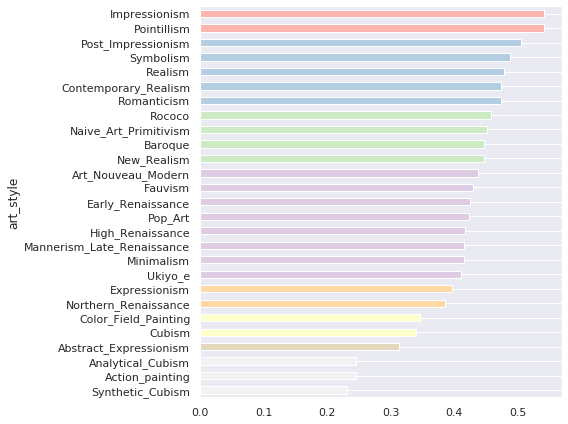

In [19]:
# Plot majority-dominance of emotions per art-style.
s = emo_domi.groupby('art_style').mean().sort_values()
norm = plt.Normalize(s.min(), s.max())
colors = plt.cm.Pastel1_r(norm(s.values))
fig = plt.figure(figsize=(8, 6))
ax = s.plot.barh(color=colors, )
ax.xaxis.grid() # horizontal lines
plt.tight_layout()

#s = emo_domi_sub.groupby('art_style').mean().sort_values()
#norm = plt.Normalize(s.min(), s.max())
#colors = plt.cm.Pastel1_r(norm(s.values))
#fig = plt.figure(figsize=(8, 6))
#ax = s.plot.barh(color=colors, )
#ax.xaxis.grid() # horizontal lines
#plt.tight_layout()

if save_figs:
    fig.savefig('emotional_majority_aggreement_per_art_style.jpg')

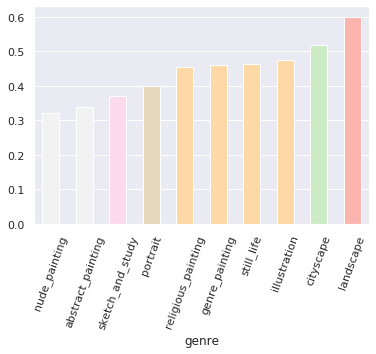

In [20]:
##
## Plot majority-dominance in emotions, per genre.
## 
# (recall - not all artworks have "genre" labels. working here with those that do.)

emo_domi.name = 'majority-aggreement'
temp = pd.merge(emo_domi, genre_info, on=['art_style', 'painting'])
s = temp.groupby('genre').mean().sort_values('majority-aggreement')
s = s['majority-aggreement']
norm = plt.Normalize(s.min(), s.max())
colors = plt.cm.Pastel1_r(norm(s.values))
fig = plt.figure()
ax = s.plot.bar(color=colors, grid=True, rot=70)
ax.xaxis.grid() # horizontal lines


#emo_domi_sub.name = 'majority-aggreement'
#temp = pd.merge(emo_domi_sub, genre_info_sub, on=['art_style', 'painting'])
#s_sub = temp.groupby('genre').mean().sort_values('majority-aggreement')
#s_sub = s_sub['majority-aggreement']
#norm = plt.Normalize(s.min(), s.max())
#colors = plt.cm.Pastel1_r(norm(s.values))
#fig = plt.figure()
#ax = s_sub.plot.bar(color=colors, grid=True, rot=70)
#ax.xaxis.grid() # horizontal lines
#
if save_figs:
    fig.savefig('emotional_majority_aggreement_per_genre.jpg')

In [21]:
print('---------------------')
print('Full Data')
print('---------------------')
print('Majority-Dominance per genre (fractions).')
print(s)

#print('---------------------')
#print('Subset Data')
#print('---------------------')
#print('Majority-Dominance per genre (fractions).')
#print(s_sub)

---------------------
Full Data
---------------------
Majority-Dominance per genre (fractions).
genre
nude_painting         0.320275
abstract_painting     0.339271
sketch_and_study      0.370615
portrait              0.400872
religious_painting    0.455667
genre_painting        0.459510
still_life            0.463092
illustration          0.474801
cityscape             0.518519
landscape             0.600874
Name: majority-aggreement, dtype: float64


In [22]:
# also now note the emotion that is the dominant (so we can count it per 1 of 9 "emotion" choices)
foo = partial(has_emotion_max_dominance, return_max=True)
emo_domi = grouped_artwork.apply(foo)
has_emo_domi = pd.Series([x[1] for x in emo_domi.values if x[0] == True]) # keeps only paintings where emo-dominance exists

# print the percentages (unormalized and normalized per emotion)
raw_emo_cnt = df.emotion.value_counts().to_dict()
emo_domi_cnt = has_emo_domi.value_counts().to_dict()
for emo in ARTEMIS_EMOTIONS:
    print("{:15}{:8}{:15.4f}".format(emo, emo_domi_cnt[emo], emo_domi_cnt[emo] / raw_emo_cnt[emo]))

amusement          2867         0.0632
awe                5213         0.0715
contentment       17145         0.1359
excitement         1314         0.0349
anger                50         0.0075
disgust             627         0.0280
fear               3301         0.0794
sadness            3876         0.0790
something else     2141         0.0404


In [23]:
is_met = df.utterance_spelled.apply(lambda x: sum([i in x for i in metaphorical_substrings]) >= 1)
print('Percent of annotations making a simile (approximate)', is_met.mean())

print('\nSamples:')
ds = df[is_met].sample(5)
for u in ds.utterance:
    print(u)

Percent of annotations making a simile (approximate) 0.2090770733080557

Samples:
I don't like the look of the man's light moustache, because it makes him look like a poorly groomed teenager.. Also, who peels a pear? That's just weird.
this looks like the painter was at an odd angle when making it
looks like a scene out of grapes of wrath
This is an odd picture of what appears to be a fisherman near a river. It does tell a story, but it does not provide much emotion.
This makes me think of a cold and lonely winter.


Token Length per genre/art_style

genre
abstract_painting     15.338144
still_life            15.486418
sketch_and_study      15.584676
landscape             15.657401
nude_painting         15.662590
portrait              15.850017
cityscape             15.962521
religious_painting    16.249924
illustration          16.377809
genre_painting        16.460087
Name: tokens_len, dtype: float64
art_style
Pointillism                   13.734843
Analytical_Cubism             13.856911
Synthetic_Cubism              14.105140
Action_painting               14.219880
Fauvism                       14.466237
Contemporary_Realism          14.673891
Minimalism                    15.006980
Color_Field_Painting          15.066897
Ukiyo_e                       15.081784
New_Realism                   15.208874
Mannerism_Late_Renaissance    15.452249
Early_Renaissance             15.459722
High_Renaissance              15.538284
Pop_Art                       15.658450
Abstract_Expressionism        15.6718

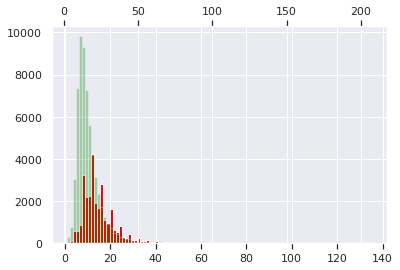

In [24]:
pedandic = True

if pedandic:
    print('Token Length per genre/art_style\n')
    print(df_with_genre.groupby('genre')['tokens_len'].mean().sort_values())
    print(df.groupby('art_style')['tokens_len'].mean().sort_values())
    
    fig, ax = plt.subplots()
    ax2 = ax.twiny()
    df_with_genre[df_with_genre['genre'] == 'abstract_painting']['tokens_len'].hist(bins=100, ax=ax, color='red')
    df_with_genre[df_with_genre['genre'] == 'genre_painting']['tokens_len'].hist(bins=100, ax=ax2, color='green', alpha=0.3)

Number of tokens per utterance (punctuations removed), for utterances with at most 50 tokens (99.34% of all utterances).


Text(0, 0.5, 'Number of utterances')

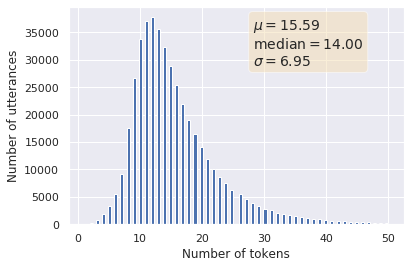

In [25]:
tokens_len = df.tokens_len[df.tokens_len <= 50]
print("Number of tokens per utterance (punctuations removed), for utterances with at most 50 tokens ({:.2f}% of all utterances).".format((df.tokens_len <= 50).mean() * 100))

mu = tokens_len.mean()
median = tokens_len.median()
sigma = tokens_len.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

ax = tokens_len.hist(bins=100)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of utterances', fontsize=12)

In [27]:
def rough_fine_grained_emotion_analysis_of_something_else(tokens):
    found_counter = 0
    fine_grained_emotion_category = None
    for t in tokens:        
        for f in LARGER_EMOTION_VOCAB:
            if t in f:
                found_counter += 1
                fine_grained_emotion_category = f[0]
    
    if found_counter == 1: # found_exactly_one
        return fine_grained_emotion_category
    else:
        return 'unclassified'

n_se = (df.emotion == 'something else').sum()
print('Full Data')
print('annotations with something-else choice:', n_se)

#print('---------------------')
#n_se = (df_sub.emotion == 'something else').sum()
#print('Subset Data')
#
#print('annotations with something-else choice:', n_se)

Full Data
annotations with something-else choice: 52962


In [28]:
se = df[df.emotion == 'something else']
fg_se_emo = se['tokens'].apply(rough_fine_grained_emotion_analysis_of_something_else)
print('Full Data')
print('---------------------')
print('These emotion-words or synnonyms are found exactly once in these many SE annotations:')
print(fg_se_emo.value_counts())


#print('---------------------')
#print('Subset Data')
#print('---------------------')
#se = df_sub[df_sub.emotion == 'something else']
#fg_se_emo = se['tokens'].apply(rough_fine_grained_emotion_analysis_of_something_else)
#print('These emotion-words or synnonyms are found exactly once in these many SE annotations:')
#print(fg_se_emo.value_counts())

Full Data
---------------------
These emotion-words or synnonyms are found exactly once in these many SE annotations:
unclassified      36836
confused           5333
bored              3904
curious            3889
happy               690
uncomfortable       371
anxiety             310
nostalgia           309
hope                295
neutral             285
creepy              277
depressing          136
overwhelmed          76
bothered             56
anticipation         49
shock                36
disappointment       31
shame                17
shy                  15
surprised            12
alerted              11
rage                  6
grief                 4
empowerment           4
thrilled              4
exhilarating          3
insult                3
Name: tokens, dtype: int64


In [52]:
df.groupby('emotion')['art_style'].count()

emotion
amusement          45336
anger               6640
awe                72927
contentment       126134
disgust            22411
excitement         37636
fear               41577
sadness            49061
something else     52962
Name: art_style, dtype: int64

In [67]:
df

art_style  \
0               Post_Impressionism   
1               Post_Impressionism   
2               Post_Impressionism   
3               Post_Impressionism   
4               Post_Impressionism   
5                    Expressionism   
6                    Expressionism   
7                    Impressionism   
8                    Impressionism   
9                    Impressionism   
10                   Impressionism   
11                   Impressionism   
12                   Impressionism   
13                   Impressionism   
14                   Impressionism   
15                   Impressionism   
16                   Impressionism   
17            Northern_Renaissance   
18            Northern_Renaissance   
19            Northern_Renaissance   
20            Northern_Renaissance   
21                         Realism   
22                         Realism   
23                         Realism   
24                         Realism   
25                         Realism   
26                         Realism   
27                         Realism   
28                         Realism   
29                         Realism   
...                            ...   
454654  Mannerism_Late_Renaissance   
454655  Mannerism_Late_Renaissance   
454656  Mannerism_Late_Renaissance   
454657  Mannerism_Late_Renaissance   
454658  Mannerism_Late_Renaissance   
454659  Mannerism_Late_Renaissance   
454660  Mannerism_Late_Renaissance   
454661  Mannerism_Late_Renaissance   
454662  Mannerism_Late_Renaissance   
454663  Mannerism_Late_Renaissance   
454664  Mannerism_Late_Renaissance   
454665  Mannerism_Late_Renaissance   
454666  Mannerism_Late_Renaissance   
454667  Mannerism_Late_Renaissance   
454668  Mannerism_Late_Renaissance   
454669  Mannerism_Late_Renaissance   
454670  Mannerism_Late_Renaissance   
454671  Mannerism_Late_Renaissance   
454672  Mannerism_Late_Renaissance   
454673  Mannerism_Late_Renaissance   
454674  Mannerism_Late_Renaissance   
454675  Mannerism_Late_Renaissance   
454676          Art_Nouveau_Modern   
454677          Post_Impressionism   
454678                      Cubism   
454679                      Cubism   
454680                 Romanticism   
454681                 Romanticism   
454682                 Romanticism   
454683                      Cubism   

                                                 painting         emotion  \
0       vincent-van-gogh_portrait-of-madame-ginoux-l-a...  something else   
1       vincent-van-gogh_portrait-of-madame-ginoux-l-a...         sadness   
2       vincent-van-gogh_portrait-of-madame-ginoux-l-a...  something else   
3       vincent-van-gogh_portrait-of-madame-ginoux-l-a...     contentment   
4       vincent-van-gogh_portrait-of-madame-ginoux-l-a...             awe   
5                 wassily-kandinsky_study-for-autumn-1909             awe   
6                 wassily-kandinsky_study-for-autumn-1909  something else   
7             konstantin-korovin_yaroslavna-s-lament-1909             awe   
8             konstantin-korovin_yaroslavna-s-lament-1909         sadness   
9       paul-gauguin_mette-gauguin-in-an-evening-dress...             awe   
10      paul-gauguin_mette-gauguin-in-an-evening-dress...       amusement   
11         pericles-pantazis_still-life-with-quinces-1880     contentment   
12         pericles-pantazis_still-life-with-quinces-1880  something else   
13                          willard-metcalf_havana-harbor             awe   
14                          willard-metcalf_havana-harbor     contentment   
15                           willard-metcalf_pond-giverny     contentment   
16                           willard-metcalf_pond-giverny     contentment   
17      albrecht-durer_design-for-the-fugger-chapel-in...       amusement   
18      albrecht-durer_design-for-the-fugger-chapel-in...      excitement   
19          robert-campin_werl-altarpiece-st-barbara-1438     contentment   
20          robert-campin_werl-altarpiece-st-barbar

In [74]:
list(df['emotion'])

['something else',
 'sadness',
 'something else',
 'contentment',
 'awe',
 'awe',
 'something else',
 'awe',
 'sadness',
 'awe',
 'amusement',
 'contentment',
 'something else',
 'awe',
 'contentment',
 'contentment',
 'contentment',
 'amusement',
 'excitement',
 'contentment',
 'amusement',
 'sadness',
 'sadness',
 'contentment',
 'sadness',
 'amusement',
 'amusement',
 'amusement',
 'contentment',
 'awe',
 'awe',
 'awe',
 'awe',
 'fear',
 'fear',
 'contentment',
 'contentment',
 'sadness',
 'awe',
 'awe',
 'contentment',
 'amusement',
 'sadness',
 'contentment',
 'excitement',
 'amusement',
 'sadness',
 'sadness',
 'sadness',
 'contentment',
 'awe',
 'contentment',
 'fear',
 'amusement',
 'awe',
 'awe',
 'excitement',
 'fear',
 'contentment',
 'contentment',
 'awe',
 'excitement',
 'amusement',
 'fear',
 'awe',
 'awe',
 'something else',
 'amusement',
 'awe',
 'amusement',
 'contentment',
 'amusement',
 'amusement',
 'fear',
 'contentment',
 'disgust',
 'contentment',
 'sadness',
 'a

In [92]:
def find_best_emotion(frequency_emotions_ordered, most_frequent_emotions):
    for emotion in reversed(frequency_emotions_ordered): # least common emotion's presence is checked first
        if emotion in most_frequent_emotions:
            return emotion

In [105]:
frequency_emotions_ordered = list(df['emotion'].value_counts().index) # Ordered list of emotion frequencies over all ratings

In [171]:
from IPython.display import clear_output
unique_paintings = df.painting.unique()
best_emotions = []
i=0
for painting in unique_paintings:
    clear_output(wait=True)
    print('{}/80031 paintings done'.format(i))
    emotions = df[df['painting']==painting]['emotion']
    emotions = emotions[emotions!='something else']
    most_frequent_emotions = list(emotions.mode())
    if len(most_frequent_emotions) > 1:
        best_emotion = find_best_emotion(frequency_emotions_ordered, most_frequent_emotions) # Best emotion = least common emotion overall, from list of most frequent emotions
    elif len(emotions) == 0:
        best_emotion = 'something else'
    else:
        best_emotion = most_frequent_emotions[0]
    best_emotions.append(best_emotion)
    i+=1

80030/80031 paintings done


In [172]:
df_paintings_with_emotion = pd.DataFrame(data={'painting': unique_paintings, 'emotion': best_emotions})

In [173]:
df_paintings_with_emotion['emotion'].value_counts()

contentment       25252
awe               12434
fear               9175
sadness            8839
amusement          8633
excitement         7866
disgust            5864
anger              1953
something else       15
Name: emotion, dtype: int64

In [181]:
list(df_paintings_with_emotion[df_paintings_with_emotion['emotion']=='something else']['painting'].values)

['jean-degottex_chattigraphie-1974',
 'gene-davis_untitled-150-1971',
 'robert-mangold_fragment-viii-2001',
 'andre-masson_l-homme-embl-matique',
 'gino-severini_still-life-1916',
 'agnes-martin_this-rain-1960',
 'martin-barre_67-f2-1967',
 'marko-pogacnik_untitled-2',
 'nicholas-roerich_sketch-for-tale-of-tsar-saltan-1919-3',
 'tano-festa_persiana-nr-4-1962',
 'burhan-dogancay_concave-shadow-sculpture-1984',
 'ellsworth-kelly_white-curve-1974',
 'ellsworth-kelly_white-on-white-1951',
 'friedel-dzubas_durango-1968',
 'felix-gonzalez-torres_untitled-double-portrait-1991']

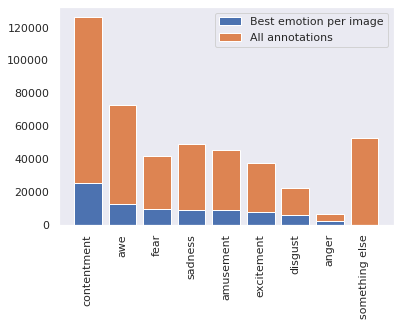

In [175]:
plt.bar(df_paintings_with_emotion['emotion'].value_counts().index, df_paintings_with_emotion['emotion'].value_counts(), label='Best emotion per image')
plt.bar(df['emotion'].value_counts().index, df['emotion'].value_counts(), zorder=-10, label='All annotations')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend()

In [183]:
df_paintings_with_emotion.to_csv('/data/s3021637/Creative-Adversarial-Networks-master/affective-creative-adverserial-net/artemis/data/Pim/best_emotions.csv', index=False, header=True)

In [177]:
df_paintings_with_emotion

painting      emotion
0      vincent-van-gogh_portrait-of-madame-ginoux-l-a...      sadness
1                wassily-kandinsky_study-for-autumn-1909          awe
2            konstantin-korovin_yaroslavna-s-lament-1909    amusement
3      paul-gauguin_mette-gauguin-in-an-evening-dress...    amusement
4         pericles-pantazis_still-life-with-quinces-1880  contentment
5                          willard-metcalf_havana-harbor          awe
6                           willard-metcalf_pond-giverny  contentment
7      albrecht-durer_design-for-the-fugger-chapel-in...    amusement
8          robert-campin_werl-altarpiece-st-barbara-1438  contentment
9      theodor-severin-kittelsen_kveld-paa-soletunet-...      sadness
10        vasily-surikov_young-lady-with-violet-overcoat  contentment
11     vasily-vereshchagin_sowar-the-messenger-of-the...         fear
12     vincent-van-gogh_head-of-a-man-with-straw-hat-...      sadness
13     william-merritt-chase_portrait-of-william-gurl...  contentment
14     viktor-vasnetsov_ivan-tsarevich-riding-the-gre...          awe
15                       william-turner_fishermen-at-sea         fear
16     jan-van-eyck_copy-drawing-of-madonna-by-the-fo...  contentment
17                         paul-cezanne_the-oilmill-1871  contentment
18           raoul-dufy_the-beach-of-sainte-adresse-1904  contentment
19                jean-francois-millet_the-winnower-1848      sadness
20     pyotr-konchalovsky_still-life-lilacs-in-the-bu...  contentment
21                nikolay-bogdanov-belsky_girl-in-a-wood      sadness
22            edgar-degas_young-spartans-exercising-1860   excitement
23                 gregoire-boonzaier_self-portrait-1969      sadness
24                  theo-van-rysselberghe_noon-landscape  contentment
25                               hoca-ali-riza_peyzaj(2)  contentment
26         giuseppe-de-nittis_sarah-bernhardt-as-pierrot    amusement
27       theodor-severin-kittelsen_dra-en-lort-sa-jeg(2)      sadness
28                                          toyen_crying      sadness
29       n.c.-wyeth_merlin-taking-away-the-infant-arthur      sadness
...                                                  ...          ...
80001       edouard-manet_young-woman-in-the-garden-1882         fear
80002  james-tissot_men-or-women-of-the-day-no-300-ca...    amusement
80003      lucas-cranach-the-elder_katharina-luther-1529      sadness
80004                 albrecht-durer_troiana-iris-detail          awe
80005    mabuse_the-mocking-of-christ-the-man-of-sorrows        anger
80006  james-tissot_statesmen-no-1230-caricature-of-t...    amusement
80007              james-tissot_the-artist-s-ladies-1885   excitement
80008            mabuse_saint-luke-painting-the-virgin-1          awe
80009                    hieronymus-bosch_haywain-1500-3  contentment
80010                         suzanne-valadon_nudes-1919  contentment
80011           hieronymus-bosch_the-last-judgement-1482          awe
80012                         albrecht-durer_young-steer  contentment
80013           lev-lagorio_along-the-coast-livadia-1895          awe
80014            albrecht-durer_st-paul-first-state-1514          awe
80015              albrecht-durer_weeping-angel-boy-1521         fear
80016  lucas-cranach-the-elder_sleeping-nymph-of-the-...    amusement
80017                             eduardo-viana_untitled      disgust
80018                    albrecht-durer_martagon-lillium      sadness
80019  hieronymus-bosch_mankind-beset-by-devils-rever...         fear
80020  lucas-cranach-the-elder_venus-and-cupid-with-a...          awe
80021     martin-schongauer_the-elephant-and-his-trainer    amusement
80022                 hans-baldung_knight-death-and-girl    amusement
80023  eugene-boudin_abbeville-street-and-the-church-...   excitement
80024  albrecht-durer_studies-on-a-great-picture-of-m...      sadness
80025  joachim-wtewael_mars-and-venus-discovered-by-t...   excitement
80026     pieter-bruegel-the-elder_go-ye-into-the-emmaus  